In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# loading data
data = np.loadtxt('data2.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')

(100, 3)


In [5]:
# data normalization
data_ori = data.copy()
maximum = np.max(data[:, :num_feature],axis=0,keepdims=True)
minimun = np.min(data[:, :num_feature],axis=0,keepdims=True)
data[:, :num_feature] = (data[:, :num_feature] - minimun)/(maximum - minimun)

In [36]:
# train val split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
y_train = data_train[:, 2].reshape(-1,1)
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2].reshape(-1,1)

In [43]:
# model init
w = np.zeros((num_feature+1,1))

def cross_entropy_loss(y_pred,y):
    return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

iterations = 10000
lr = 0.1

In [44]:
log = []
# gradient descent
for i in range(iterations):
    y_pred = sigmoid(np.matmul(X_train, w))
    g = lr*np.mean((y_pred-y_train)*X_train, axis=0).reshape(-1,1)
    w -= g
    loss = cross_entropy_loss(y_pred,y_train)
    print('iter:{},loss:{}'.format(i,loss))
    log.append([i,loss])
    y_pred_test = sigmoid(np.matmul(X_test, w))
    loss = cross_entropy_loss(y_pred_test,y_test)
#     print('iter:{},val_loss:{}'.format(i,loss))


iter:0,loss:0.6931471805599454
iter:1,loss:0.690488847750495
iter:2,loss:0.6879770556434447
iter:3,loss:0.6856007169562689
iter:4,loss:0.6833495758850293
iter:5,loss:0.6812141503511714
iter:6,loss:0.6791856773167904
iter:7,loss:0.6772560611910615
iter:8,loss:0.6754178253054768
iter:9,loss:0.673664066400354
iter:10,loss:0.6719884120382522
iter:11,loss:0.670384980840084
iter:12,loss:0.6688483454255969
iter:13,loss:0.6673734979305386
iter:14,loss:0.6659558179672644
iter:15,loss:0.6645910428930634
iter:16,loss:0.6632752402504053
iter:17,loss:0.662004782245131
iter:18,loss:0.6607763221318456
iter:19,loss:0.6595867723800781
iter:20,loss:0.6584332844998364
iter:21,loss:0.6573132304107576
iter:22,loss:0.6562241852449462
iter:23,loss:0.6551639114796474
iter:24,loss:0.6541303443019786
iter:25,loss:0.6531215781139827
iter:26,loss:0.6521358540921564
iter:27,loss:0.6511715487213147
iter:28,loss:0.650227163228155
iter:29,loss:0.6493013138451109
iter:30,loss:0.6483927228400697
iter:31,loss:0.64750021

iter:1139,loss:0.33602488790884466
iter:1140,loss:0.33592398725423783
iter:1141,loss:0.3358232055403198
iter:1142,loss:0.3357225425549561
iter:1143,loss:0.3356219980865108
iter:1144,loss:0.3355215719238433
iter:1145,loss:0.3354212638563089
iter:1146,loss:0.33532107367375585
iter:1147,loss:0.3352210011665246
iter:1148,loss:0.33512104612544624
iter:1149,loss:0.3350212083418412
iter:1150,loss:0.33492148760751755
iter:1151,loss:0.3348218837147704
iter:1152,loss:0.3347223964563793
iter:1153,loss:0.33462302562560803
iter:1154,loss:0.3345237710162025
iter:1155,loss:0.33442463242238984
iter:1156,loss:0.3343256096388764
iter:1157,loss:0.33422670246084707
iter:1158,loss:0.3341279106839637
iter:1159,loss:0.3340292341043635
iter:1160,loss:0.3339306725186581
iter:1161,loss:0.3338322257239317
iter:1162,loss:0.3337338935177402
iter:1163,loss:0.33363567569810954
iter:1164,loss:0.333537572063535
iter:1165,loss:0.3334395824129788
iter:1166,loss:0.3333417065458694
iter:1167,loss:0.3332439442621007
iter:1

iter:2135,loss:0.2725273594755661
iter:2136,loss:0.2724869498566259
iter:2137,loss:0.27244656960353614
iter:2138,loss:0.27240621868352116
iter:2139,loss:0.2723658970638548
iter:2140,loss:0.2723256047118598
iter:2141,loss:0.27228534159490864
iter:2142,loss:0.2722451076804221
iter:2143,loss:0.27220490293587046
iter:2144,loss:0.27216472732877245
iter:2145,loss:0.2721245808266959
iter:2146,loss:0.27208446339725684
iter:2147,loss:0.2720443750081201
iter:2148,loss:0.27200431562699934
iter:2149,loss:0.27196428522165594
iter:2150,loss:0.27192428375990013
iter:2151,loss:0.27188431120958984
iter:2152,loss:0.2718443675386314
iter:2153,loss:0.27180445271497927
iter:2154,loss:0.2717645667066355
iter:2155,loss:0.2717247094816505
iter:2156,loss:0.2716848810081218
iter:2157,loss:0.27164508125419484
iter:2158,loss:0.27160531018806294
iter:2159,loss:0.2715655677779665
iter:2160,loss:0.27152585399219337
iter:2161,loss:0.27148616879907883
iter:2162,loss:0.27144651216700544
iter:2163,loss:0.271406884064402

iter:3154,loss:0.2424107437300443
iter:3155,loss:0.24238909190845292
iter:3156,loss:0.242367451358599
iter:3157,loss:0.24234582207150135
iter:3158,loss:0.24232420403818875
iter:3159,loss:0.2423025972496992
iter:3160,loss:0.24228100169708097
iter:3161,loss:0.24225941737139126
iter:3162,loss:0.24223784426369777
iter:3163,loss:0.24221628236507692
iter:3164,loss:0.24219473166661531
iter:3165,loss:0.24217319215940927
iter:3166,loss:0.24215166383456413
iter:3167,loss:0.24213014668319532
iter:3168,loss:0.24210864069642765
iter:3169,loss:0.24208714586539531
iter:3170,loss:0.24206566218124234
iter:3171,loss:0.24204418963512217
iter:3172,loss:0.24202272821819767
iter:3173,loss:0.24200127792164114
iter:3174,loss:0.24197983873663467
iter:3175,loss:0.24195841065436965
iter:3176,loss:0.2419369936660467
iter:3177,loss:0.24191558776287642
iter:3178,loss:0.24189419293607842
iter:3179,loss:0.24187280917688153
iter:3180,loss:0.24185143647652474
iter:3181,loss:0.24183007482625576
iter:3182,loss:0.24180872

iter:4243,loss:0.22401793899551775
iter:4244,loss:0.22400475667911232
iter:4245,loss:0.2239915796520866
iter:4246,loss:0.22397840791122017
iter:4247,loss:0.22396524145329547
iter:4248,loss:0.22395208027509764
iter:4249,loss:0.22393892437341426
iter:4250,loss:0.22392577374503575
iter:4251,loss:0.22391262838675513
iter:4252,loss:0.22389948829536793
iter:4253,loss:0.22388635346767247
iter:4254,loss:0.2238732239004698
iter:4255,loss:0.2238600995905633
iter:4256,loss:0.22384698053475924
iter:4257,loss:0.2238338667298665
iter:4258,loss:0.22382075817269634
iter:4259,loss:0.22380765486006302
iter:4260,loss:0.2237945567887831
iter:4261,loss:0.22378146395567597
iter:4262,loss:0.22376837635756353
iter:4263,loss:0.22375529399127042
iter:4264,loss:0.22374221685362364
iter:4265,loss:0.22372914494145302
iter:4266,loss:0.22371607825159093
iter:4267,loss:0.22370301678087237
iter:4268,loss:0.2236899605261349
iter:4269,loss:0.2236769094842187
iter:4270,loss:0.2236638636519665
iter:4271,loss:0.22365082302

iter:5333,loss:0.2122221389772845
iter:5334,loss:0.21221325584395062
iter:5335,loss:0.21220437562511552
iter:5336,loss:0.21219549831934348
iter:5337,loss:0.2121866239251997
iter:5338,loss:0.21217775244125028
iter:5339,loss:0.21216888386606225
iter:5340,loss:0.2121600181982038
iter:5341,loss:0.21215115543624385
iter:5342,loss:0.21214229557875244
iter:5343,loss:0.21213343862430026
iter:5344,loss:0.21212458457145944
iter:5345,loss:0.21211573341880266
iter:5346,loss:0.21210688516490367
iter:5347,loss:0.21209803980833725
iter:5348,loss:0.2120891973476791
iter:5349,loss:0.21208035778150566
iter:5350,loss:0.2120715211083947
iter:5351,loss:0.21206268732692454
iter:5352,loss:0.2120538564356748
iter:5353,loss:0.21204502843322579
iter:5354,loss:0.21203620331815884
iter:5355,loss:0.21202738108905628
iter:5356,loss:0.21201856174450132
iter:5357,loss:0.21200974528307812
iter:5358,loss:0.2120009317033718
iter:5359,loss:0.21199212100396833
iter:5360,loss:0.2119833131834549
iter:5361,loss:0.21197450824

iter:6407,loss:0.2041101110431906
iter:6408,loss:0.20410369148114416
iter:6409,loss:0.20409727371325992
iter:6410,loss:0.20409085773879312
iter:6411,loss:0.2040844435569995
iter:6412,loss:0.20407803116713508
iter:6413,loss:0.20407162056845657
iter:6414,loss:0.2040652117602207
iter:6415,loss:0.20405880474168492
iter:6416,loss:0.20405239951210702
iter:6417,loss:0.20404599607074514
iter:6418,loss:0.20403959441685798
iter:6419,loss:0.20403319454970445
iter:6420,loss:0.20402679646854416
iter:6421,loss:0.20402040017263676
iter:6422,loss:0.20401400566124261
iter:6423,loss:0.20400761293362238
iter:6424,loss:0.20400122198903722
iter:6425,loss:0.20399483282674855
iter:6426,loss:0.20398844544601835
iter:6427,loss:0.20398205984610895
iter:6428,loss:0.20397567602628316
iter:6429,loss:0.20396929398580393
iter:6430,loss:0.20396291372393505
iter:6431,loss:0.20395653523994045
iter:6432,loss:0.20395015853308454
iter:6433,loss:0.203943783602632
iter:6434,loss:0.2039374104478482
iter:6435,loss:0.203931039

iter:7465,loss:0.19819371542712483
iter:7466,loss:0.19818884687880828
iter:7467,loss:0.19818397952287875
iter:7468,loss:0.198179113358907
iter:7469,loss:0.19817424838646439
iter:7470,loss:0.1981693846051222
iter:7471,loss:0.1981645220144522
iter:7472,loss:0.19815966061402587
iter:7473,loss:0.19815480040341552
iter:7474,loss:0.1981499413821932
iter:7475,loss:0.19814508354993146
iter:7476,loss:0.19814022690620273
iter:7477,loss:0.19813537145058002
iter:7478,loss:0.19813051718263636
iter:7479,loss:0.19812566410194493
iter:7480,loss:0.19812081220807926
iter:7481,loss:0.19811596150061292
iter:7482,loss:0.19811111197911993
iter:7483,loss:0.1981062636431742
iter:7484,loss:0.1981014164923501
iter:7485,loss:0.19809657052622218
iter:7486,loss:0.198091725744365
iter:7487,loss:0.19808688214635356
iter:7488,loss:0.19808203973176294
iter:7489,loss:0.1980771985001684
iter:7490,loss:0.19807235845114554
iter:7491,loss:0.19806751958427007
iter:7492,loss:0.1980626818991179
iter:7493,loss:0.19805784539526

iter:8282,loss:0.1945782123798171
iter:8283,loss:0.1945741917446445
iter:8284,loss:0.1945701720106716
iter:8285,loss:0.1945661531776041
iter:8286,loss:0.19456213524514784
iter:8287,loss:0.1945581182130088
iter:8288,loss:0.19455410208089297
iter:8289,loss:0.19455008684850675
iter:8290,loss:0.19454607251555628
iter:8291,loss:0.1945420590817482
iter:8292,loss:0.19453804654678905
iter:8293,loss:0.19453403491038562
iter:8294,loss:0.19453002417224471
iter:8295,loss:0.19452601433207328
iter:8296,loss:0.19452200538957876
iter:8297,loss:0.19451799734446787
iter:8298,loss:0.19451399019644844
iter:8299,loss:0.19450998394522767
iter:8300,loss:0.19450597859051344
iter:8301,loss:0.19450197413201348
iter:8302,loss:0.19449797056943552
iter:8303,loss:0.19449396790248769
iter:8304,loss:0.1944899661308782
iter:8305,loss:0.1944859652543153
iter:8306,loss:0.19448196527250725
iter:8307,loss:0.1944779661851627
iter:8308,loss:0.19447396799199027
iter:8309,loss:0.19446997069269886
iter:8310,loss:0.194465974286

iter:9372,loss:0.19067398779128777
iter:9373,loss:0.19067079895533043
iter:9374,loss:0.19066761076345862
iter:9375,loss:0.19066442321548474
iter:9376,loss:0.19066123631122148
iter:9377,loss:0.19065805005048153
iter:9378,loss:0.19065486443307764
iter:9379,loss:0.1906516794588225
iter:9380,loss:0.1906484951275292
iter:9381,loss:0.19064531143901062
iter:9382,loss:0.1906421283930797
iter:9383,loss:0.19063894598954956
iter:9384,loss:0.19063576422823353
iter:9385,loss:0.19063258310894474
iter:9386,loss:0.19062940263149658
iter:9387,loss:0.19062622279570232
iter:9388,loss:0.19062304360137558
iter:9389,loss:0.19061986504832984
iter:9390,loss:0.1906166871363787
iter:9391,loss:0.19061350986533596
iter:9392,loss:0.1906103332350151
iter:9393,loss:0.19060715724523028
iter:9394,loss:0.1906039818957953
iter:9395,loss:0.19060080718652408
iter:9396,loss:0.19059763311723063
iter:9397,loss:0.19059445968772917
iter:9398,loss:0.1905912868978338
iter:9399,loss:0.190588114747359
iter:9400,loss:0.190584943236

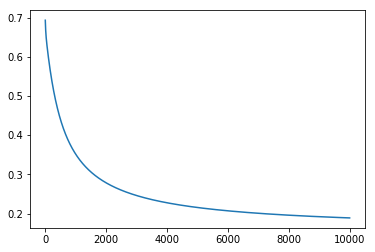

In [47]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

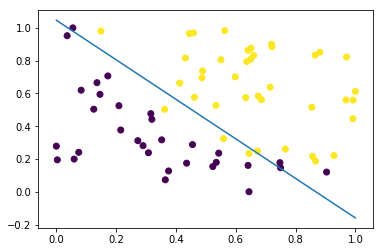

In [49]:
# visualization
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.flatten())
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)


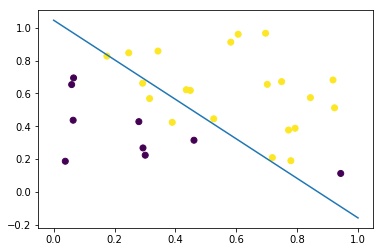

In [50]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test.flatten())
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)

-0.020202707317519466

(70, 70)